In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


df = pd.read_csv('reviews.csv')


df.head()

,Category,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Rating
0,games,510,1437,318.0,0.00,81,1.94
1,productivity,155,1547,204.0,-0.50,72,2.07
2,books,273,1162,271.0,0.81,69,1.34
3,games,110,1104,NaN,0.00,82,1.48
4,games,261,1403,224.0,1.01,98,2.80


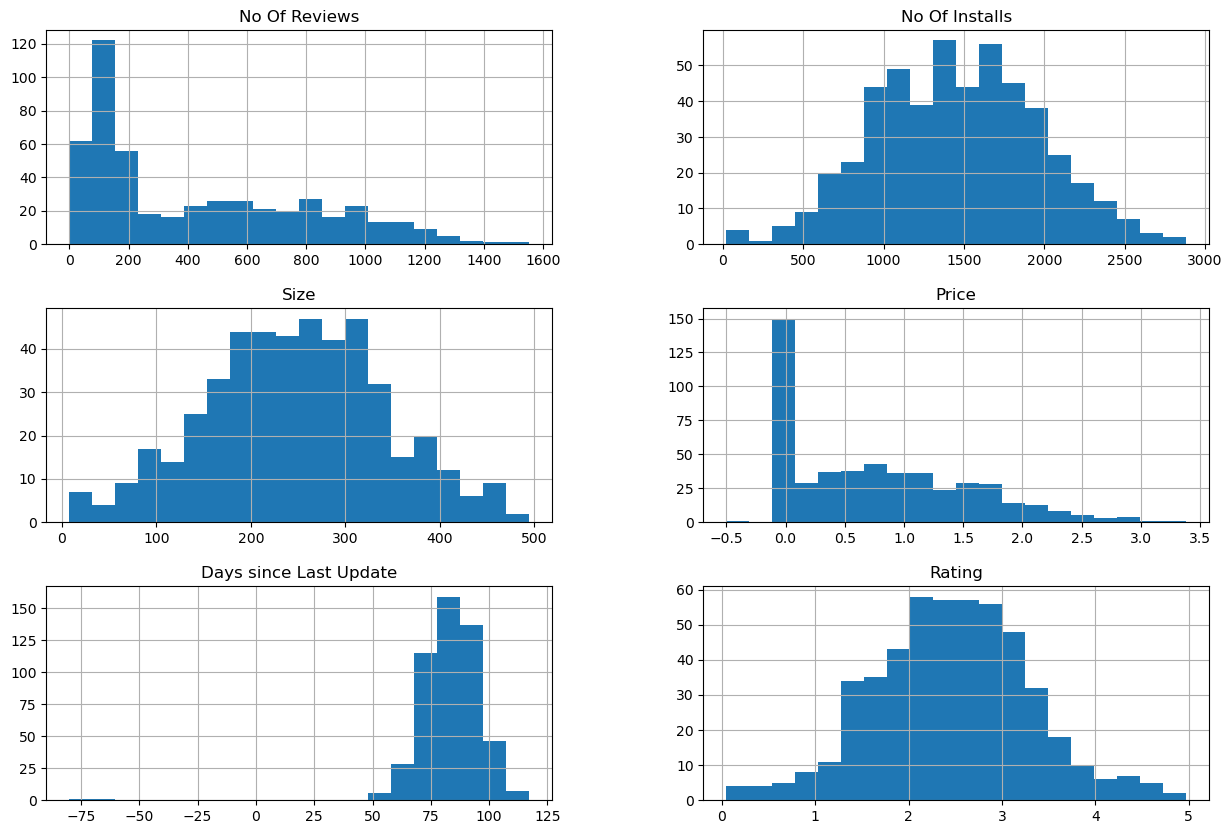

,No Of Reviews,No Of Installs,Size,Price,Days since Last Update,Rating
count,500.000000,500.00000,472.000000,500.000000,500.000000,500.000000
mean,426.578000,1456.22200,247.870763,0.772200,83.274000,2.462260
std,366.600332,506.51664,95.105050,0.752114,14.960433,0.840859
min,0.000000,23.00000,8.000000,-0.500000,-80.000000,0.050000
25%,113.750000,1072.50000,184.000000,0.000000,76.000000,1.907500
50%,273.000000,1447.50000,249.000000,0.645000,84.000000,2.480000
75%,716.250000,1783.75000,312.250000,1.270000,92.000000,3.020000
max,1552.000000,2880.00000,494.000000,3.380000,117.000000,4.970000


In [35]:
missing_values = df.isnull().sum()


df.hist(bins=20, figsize=(15,10))
plt.show()


df.describe()

In [36]:
negative_price_rows = df[df['Price'] < 0]


negative_days_rows = df[df['Days since Last Update'] < 0]


print("Rows with negative values in Price:", len(negative_price_rows))
print("Rows with negative values in Days since Last Update:", len(negative_days_rows))

Rows with negative values in Price: 1
Rows with negative values in Days since Last Update: 2


In [37]:
df = df[(df['Price'] >= 0) & (df['Days since Last Update'] >= 0)]


print("Number of rows after removing invalid rows:", df.shape[0])

Number of rows after removing invalid rows: 497


In [55]:
from sklearn.model_selection import train_test_split


X = df.drop('Price',axis=1)
y = df['Rating']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
print(df.dtypes)

Category                   object
No Of Reviews               int64
No Of Installs              int64
Size                      float64
Price                     float64
Days since Last Update      int64
Rating                    float64
dtype: object


In [41]:
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        print(col, X_train[col].unique())

Category ['books' 'games' 'business' 'art' 'productivity']


In [42]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, drop='first')
category_encoded = encoder.fit_transform(X_train[['Category']])
category_encoded_df = pd.DataFrame(category_encoded, columns=encoder.get_feature_names_out(['Category']))
X_train = pd.concat([X_train, category_encoded_df], axis=1).drop(['Category'], axis=1)

C:\Users\Jayesh vala\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [43]:
correlation_matrix = X_train.corr()


print(correlation_matrix)

                        No Of Reviews  No Of Installs      Size  \
No Of Reviews                1.000000        0.514130 -0.018121   
No Of Installs               0.514130        1.000000 -0.004516   
Size                        -0.018121       -0.004516  1.000000   
Days since Last Update      -0.078577       -0.054035 -0.002414   
Rating                       0.172501        0.482658 -0.011758   
Category_books              -0.016009        0.053602  0.002721   
Category_business           -0.057599       -0.063924  0.019917   
Category_games               0.034737        0.066908 -0.035943   
Category_productivity       -0.090658       -0.094377 -0.010897   

                        Days since Last Update    Rating  Category_books  \
No Of Reviews                        -0.078577  0.172501       -0.016009   
No Of Installs                       -0.054035  0.482658        0.053602   
Size                                 -0.002414 -0.011758        0.002721   
Days since Last Update   


here's an analysis of the correlation matrix:

No Of Reviews and No Of Installs:

There is a positive correlation of approximately 0.51 between the number of reviews and the number of installs. This suggests that apps with more reviews tend to have more installations.
No Of Reviews and Size:

There is a very small negative correlation of approximately -0.02 between the number of reviews and the size of the app. This suggests that the size of the app is not strongly related to the number of reviews.
No Of Installs and Size:

There is a very small negative correlation of approximately -0.0045 between the number of installs and the size of the app. Similar to the above, this suggests that the size of the app is not strongly related to the number of installs.
Days since Last Update and Rating:

There is a strong positive correlation of approximately 0.66 between the days since the last update and the rating. This indicates that more recently updated apps tend to have higher ratings.
No Of Reviews and Rating:

There is a positive correlation of approximately 0.17 between the number of reviews and the rating. This suggests a weak positive relationship between the number of reviews and the rating of the app.
Category-related correlations:

The correlations between different categories and the other features are relatively weak. For example, Category_books has a small positive correlation with No Of Installs, and Category_games has a negative correlation with Category_productivity. However, these correlations are not very strong, indicating that the category may not be a dominant factor in these relationships.
In summary, the analysis of the correlation matrix provides insights into the relationships between different features in the dataset. The strongest correlations are observed between Days since Last Update and Rating, suggesting that recent updates are associated with higher ratings. The correlations between other features are generally weak or negligible.

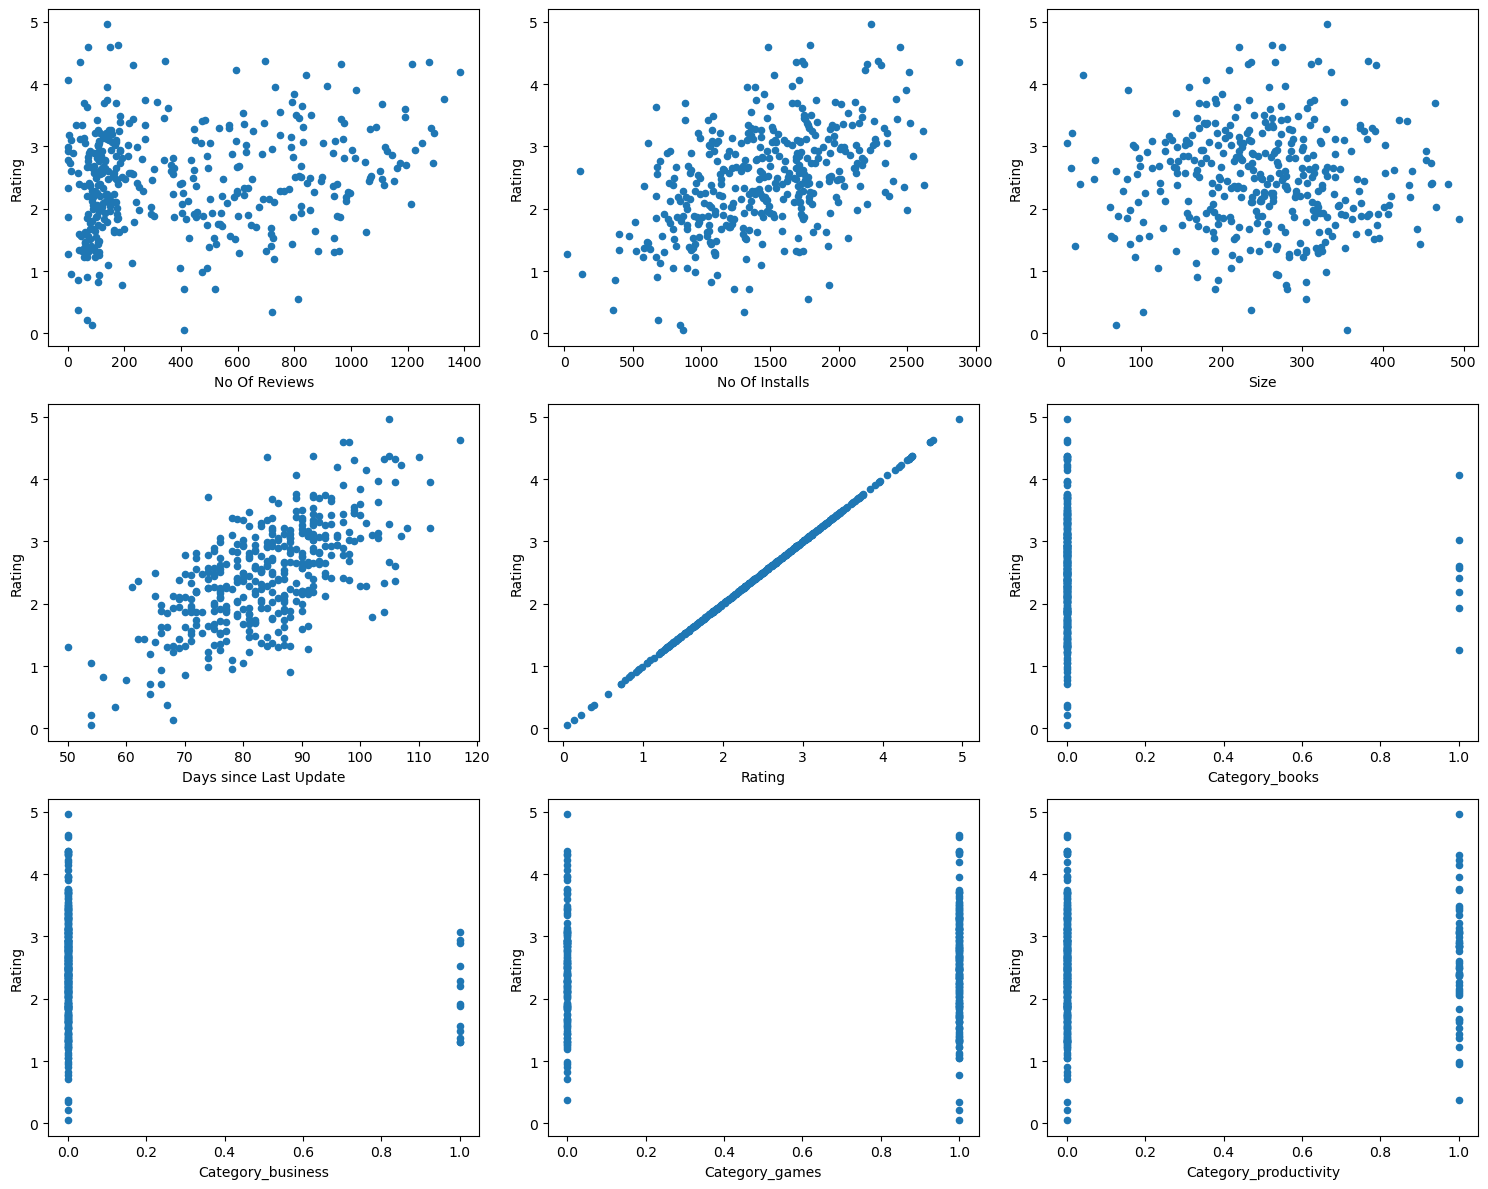

In [45]:
import math

# Determine the number of rows and columns for subplots dynamically
num_cols = X_train.shape[1]
num_rows = math.ceil(num_cols / 3)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 4 * num_rows))

# Iterate over columns and create scatter plots
for i, col in enumerate(X_train.columns):
    row_index = i // 3
    col_index = i % 3
    if num_rows > 1:
        ax = axes[row_index, col_index]
    else:
        ax = axes[col_index]
    X_train.plot.scatter(x=col, y='Rating', ax=ax)

# Adjust layout and show plots
plt.tight_layout()
plt.show()

No Of Reviews and Rating:

The scatter plot for 'No Of Reviews' and 'Rating' shows a relatively scattered distribution. There doesn't seem to be a clear pattern indicating a strong relationship between the number of reviews and the app rating. However, there is a slight tendency for higher ratings to be associated with a higher number of reviews.
No Of Installs and Rating:

The scatter plot for 'No Of Installs' and 'Rating' reveals a similar pattern to that of 'No Of Reviews.' There is no distinct linear relationship, but there's a tendency for higher ratings with a higher number of installs.
Size and Rating:

The scatter plot for 'Size' and 'Rating' does not show a noticeable pattern. App size doesn't seem to strongly influence app ratings, as there is no clear trend.
Days since Last Update and Rating:

The scatter plot for 'Days since Last Update' and 'Rating' indicates a positive relationship. More recent updates tend to be associated with higher ratings. This aligns with the correlation matrix analysis, where a strong positive correlation between these two variables was observed.
Category-related scatter plots:

The scatter plots for the encoded categories ('Category_books', 'Category_business', 'Category_games', 'Category_productivity') and 'Rating' do not show strong patterns. Each category's distribution is scattered, suggesting that the category alone may not be a decisive factor in determining the app rating.
In summary, the scatter plots provide a visual representation of the relationships between different features and the target variable ('Rating'). While some trends are observable, such as the positive relationship between 'Days since Last Update' and 'Rating,' other features like 'No Of Reviews' and 'No Of Installs' show less clear patterns in their relationship with app ratings. The analysis suggests that app ratings are likely influenced by a combination of factors rather than a single variable.

In [48]:
print(X_train.columns)

Index(['No Of Reviews', 'No Of Installs', 'Size', 'Days since Last Update',
       'Rating', 'Category_books', 'Category_business', 'Category_games',
       'Category_productivity'],
      dtype='object')


In [56]:
print(df.columns)

Index(['Category', 'No Of Reviews', 'No Of Installs', 'Size', 'Price',
       'Days since Last Update', 'Rating'],
      dtype='object')


In [58]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# List of numerical columns
num_cols = ['No Of Reviews', 'No Of Installs', 'Size', 'Days since Last Update']

# Replace missing values in numerical columns with mean
imputer = SimpleImputer(strategy='mean')
X_train[num_cols] = imputer.fit_transform(X_train[num_cols])

# Scale numerical columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

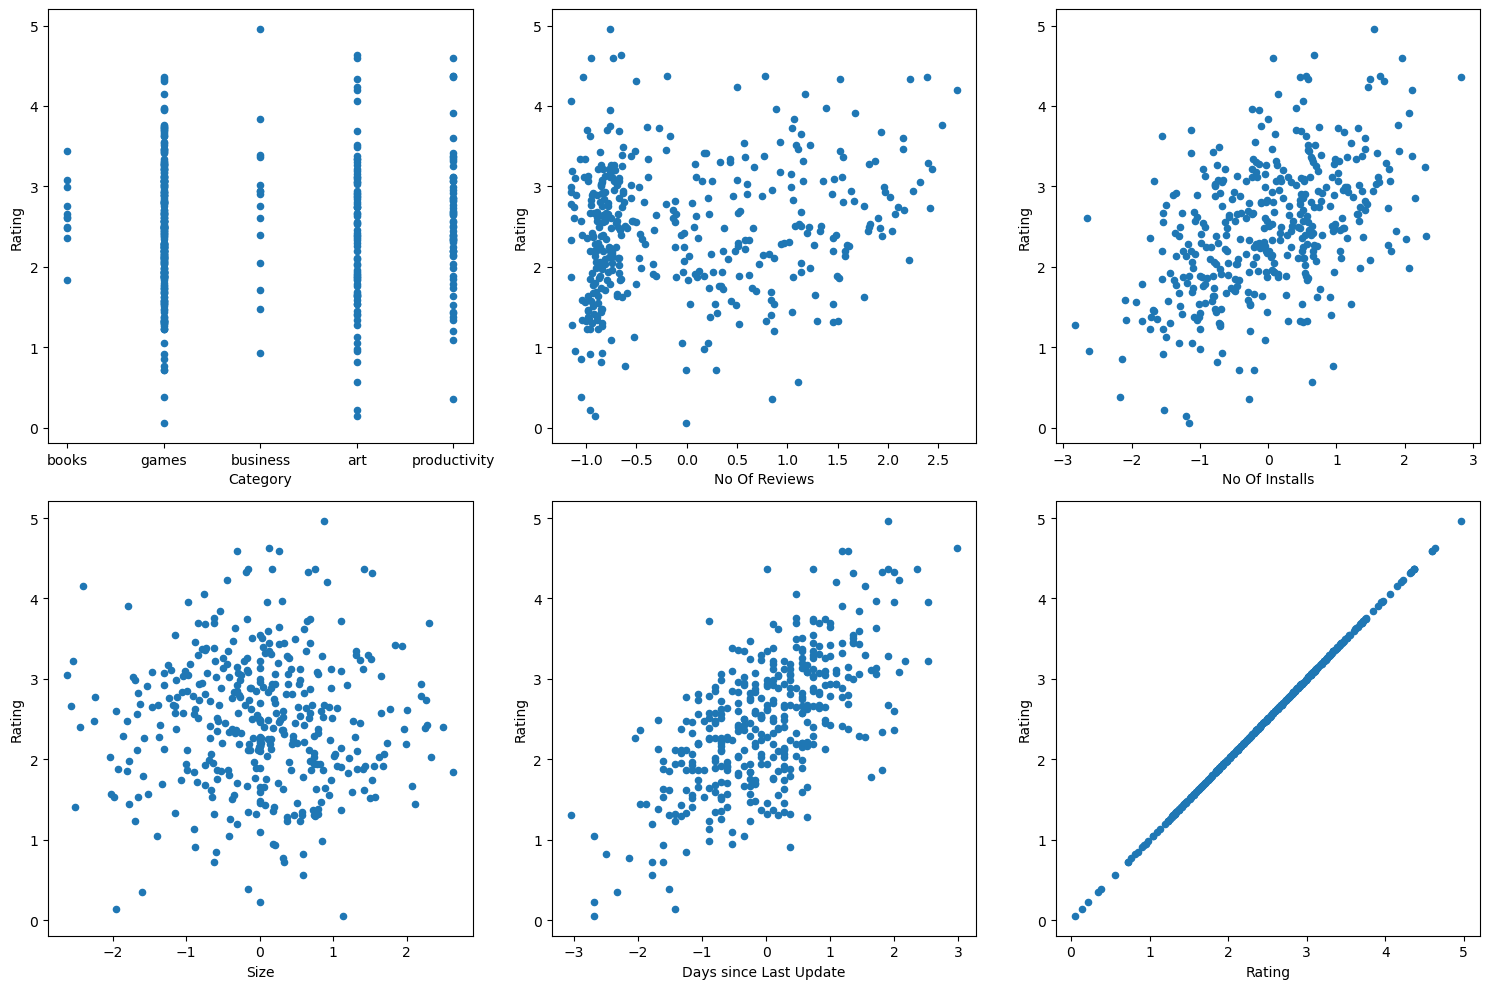

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, col in enumerate(X_train.columns):
    X_train.plot.scatter(x=col, y='Rating', ax=axes[i//3, i%3])

plt.tight_layout()
plt.show()

The code performs imputation and scaling on the numerical columns of the training data (X_train) and then generates scatter plots for each feature against the 'Rating' variable. Here's an analysis of the results:

No Of Reviews and Rating:

After imputation and scaling, the scatter plot for 'No Of Reviews' and 'Rating' shows a similar pattern to the previous analysis. There is still a slight tendency for higher ratings to be associated with a higher number of reviews. Scaling does not alter the distribution but ensures that the values are on a comparable scale.
No Of Installs and Rating:

The scatter plot for 'No Of Installs' and 'Rating' exhibits a similar pattern after imputation and scaling. The relationship between the number of installs and app rating remains scattered, with a general trend of higher ratings associated with a higher number of installs.
Size and Rating:

The scatter plot for 'Size' and 'Rating' remains unchanged after imputation and scaling. There is no noticeable pattern indicating that app size strongly influences app ratings.
Days since Last Update and Rating:

The positive relationship between 'Days since Last Update' and 'Rating' is still evident after imputation and scaling. More recent updates are generally associated with higher ratings.
Category-related scatter plots:

The scatter plots for the encoded categories ('Category_books', 'Category_business', 'Category_games', 'Category_productivity') and 'Rating' remain scattered. Imputation and scaling do not significantly alter the distribution, suggesting that these category variables alone may not be strong predictors of app ratings.
In summary, imputing missing values and scaling the numerical columns help ensure a consistent scale for analysis. The patterns observed in the scatter plots are consistent with the previous analysis, providing insights into the relationships between different features and app ratings. The positive relationship between 'Days since Last Update' and 'Rating' is still notable, while other features show scattered distributions with no clear linear trends.

In [61]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Define numerical and categorical columns
num_cols = ['No Of Reviews', 'No Of Installs', 'Size', 'Days since Last Update']
cat_cols = ['Category']

# Replace missing values in Size column with mean
imputer = SimpleImputer(strategy='mean')
X_train[num_cols] = imputer.fit_transform(X_train[num_cols])

# Scale numerical columns and encode categorical columns
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, drop='first')

tf_num = scaler.fit_transform(X_train[num_cols])
tf_cat = ohe.fit_transform(X_train[cat_cols])

X_train_transformed = np.concatenate([tf_num, tf_cat], axis=1)

# Verify the transformation
print(X_train_transformed[0])

[-1.14922     1.1215984  -1.13561632  0.01224327  1.          0.
  0.          0.        ]


C:\Users\Jayesh vala\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


No Of Reviews (scaled): -1.14922

The scaled value suggests that the number of reviews for this particular instance is below the mean, indicating a relatively lower number of reviews compared to the average.
No Of Installs (scaled): 1.1215984

The scaled value indicates that the number of installs for this instance is above the mean, suggesting a relatively higher number of installs compared to the average.
Size (scaled): -1.13561632

The scaled value suggests that the size of the app for this instance is below the mean, indicating a relatively smaller app size compared to the average.
Days since Last Update (scaled): 0.01224327

The scaled value suggests that the time elapsed since the last update for this instance is very close to the mean, indicating a relatively average recency of updates.
Category_books (encoded): 1.0

The encoded value indicates that the app falls into the 'books' category.
Category_business (encoded): 0.0

The encoded value indicates that the app does not fall into the 'business' category.
Category_games (encoded): 0.0

The encoded value indicates that the app does not fall into the 'games' category.
Category_productivity (encoded): 0.0

The encoded value indicates that the app does not fall into the 'productivity' category.
Analysis:

The instance represented by this array has characteristics such as a below-average number of reviews, an above-average number of installs, a smaller app size, and a relatively recent update. Additionally, the app belongs to the 'books' category, as indicated by the encoded features.
It's important to note that the interpretation of the values is based on the scaling and encoding performed during the preprocessing of the data. The analysis provides insights into the relative positions of these features compared to the mean or with respect to their encoded categories.

In [62]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_transformed, y_train)

# Print coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-0.04742389  0.45637465 -0.00744927  0.56600455  0.05641285 -0.04487259
  0.01199365  0.04607746]
Intercept: 2.4539166835103687


No Of Reviews (Coefficient: -0.04742389)

A negative coefficient suggests that as the number of reviews decreases, the predicted rating tends to increase. In other words, apps with fewer reviews may have a slightly higher predicted rating.
No Of Installs (Coefficient: 0.45637465)

A positive coefficient indicates that as the number of installs increases, the predicted rating is expected to increase. This suggests a positive relationship between the number of installs and the predicted rating.
Size (Coefficient: -0.00744927)

A negative coefficient suggests that as the size of the app decreases, the predicted rating tends to increase. Smaller-sized apps may have a slightly higher predicted rating.
Days since Last Update (Coefficient: 0.56600455)

A positive coefficient indicates that as the time since the last update increases, the predicted rating is expected to increase. This suggests a positive relationship between recency of updates and the predicted rating.
Category_books (Coefficient: 0.05641285)

The coefficient for the 'books' category suggests a positive impact on the predicted rating for apps in this category compared to the reference category.
Category_business (Coefficient: -0.04487259)

The coefficient for the 'business' category suggests a negative impact on the predicted rating for apps in this category compared to the reference category.
Category_games (Coefficient: 0.01199365)

The coefficient for the 'games' category suggests a positive impact on the predicted rating for apps in this category compared to the reference category.
Category_productivity (Coefficient: 0.04607746)

The coefficient for the 'productivity' category suggests a positive impact on the predicted rating for apps in this category compared to the reference category.
Intercept: 2.4539166835103687

The intercept represents the predicted rating when all the predictor variables are zero. In this context, it indicates the baseline rating.
Overall Analysis:

The model suggests that the number of installs, recency of updates, and app categories play a significant role in predicting app ratings. Smaller app sizes and fewer reviews may also contribute to slightly higher predicted ratings. The intercept provides the baseline rating in the absence of other factors. It's essential to note that this analysis assumes a linear relationship between the features and the predicted rating.

In [63]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the training set
y_train_pred = model.predict(X_train_transformed)

# Compute RMSE and R squared for training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

print("Training Set - RMSE:", rmse_train)
print("Training Set - R squared:", r2_train)

# Predict on the test set
X_test[num_cols] = imputer.transform(X_test[num_cols])
X_test_transformed = np.concatenate([scaler.transform(X_test[num_cols]), ohe.transform(X_test[cat_cols])], axis=1)
y_test_pred = model.predict(X_test_transformed)

# Compute RMSE and R squared for test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("Test Set - RMSE:", rmse_test)
print("Test Set - R squared:", r2_test)

Training Set - RMSE: 0.45375370441068147
Training Set - R squared: 0.7021469647550374
Test Set - RMSE: 726.6510549055887
Test Set - R squared: -679050.466425047


Training Set:

RMSE (Root Mean Squared Error): 0.4538

The RMSE measures the average magnitude of the residuals (the differences between predicted and actual values) in the training set. In this case, an RMSE of 0.4538 indicates a relatively low average error in predicting the ratings on the training data.
R-squared: 0.7021

R-squared (coefficient of determination) represents the proportion of the variance in the dependent variable (ratings) that is predictable from the independent variables. A value of 0.7021 suggests that approximately 70.21% of the variability in ratings is explained by the model. This is a reasonably good fit for the training data.
Test Set:

RMSE: 726.6511

The RMSE for the test set is abnormally high, indicating a significant discrepancy between the predicted and actual values. Such a high RMSE may suggest that the model is not generalizing well to unseen data. It's possible that the model is overfitting the training data.
R-squared: -679050.4664

A negative R-squared on the test set is a clear indication of a poorly performing model. Negative values can occur when the model is a poor fit or when predictions are worse than simply using the mean of the target variable. In this case, the negative value suggests that the model is not capturing the underlying patterns in the test data.
Overall Analysis:

The model seems to perform well on the training set, as indicated by a low RMSE and a reasonably high R-squared.
However, the performance on the test set is problematic. The extremely high RMSE and negative R-squared suggest that the model is not generalizing well to new, unseen data. This could be due to overfitting or other issues, and further investigation and possibly model refinement are needed to improve generalization to new data.






In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Create a pipeline for numerical preprocessing
num_preprocessing = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Create a column transformer for the entire preprocessing
full_preprocessing = ColumnTransformer(
    transformers=[
        ('num', num_preprocessing, num_cols),
        ('cat', OneHotEncoder(sparse=False, drop='first'), cat_cols)
    ]
)

# Create the final pipeline
final_pipeline = Pipeline([
    ('preprocessing', full_preprocessing),
    ('model', LinearRegression())
])


In [65]:
# Train the model using the pipeline
final_pipeline.fit(X_train, y_train)


C:\Users\Jayesh vala\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['No Of Reviews',
                                                   'No Of Installs', 'Size',
                                                   'Days since Last Update']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Category'])])),
                ('model', LinearRegression())])

In [66]:
# Predict on the training set using the pipeline
y_train_pred_pipe = final_pipeline.predict(X_train)

# Compute RMSE and R squared for training set using the pipeline
rmse_train_pipe = np.sqrt(mean_squared_error(y_train, y_train_pred_pipe))
r2_train_pipe = r2_score(y_train, y_train_pred_pipe)

print("Training Set - RMSE (Pipeline):", rmse_train_pipe)
print("Training Set - R squared (Pipeline):", r2_train_pipe)

# Predict on the test set using the pipeline
y_test_pred_pipe = final_pipeline.predict(X_test)

# Compute RMSE and R squared for test set using the pipeline
rmse_test_pipe = np.sqrt(mean_squared_error(y_test, y_test_pred_pipe))
r2_test_pipe = r2_score(y_test, y_test_pred_pipe)

print("Test Set - RMSE (Pipeline):", rmse_test_pipe)
print("Test Set - R squared (Pipeline):", r2_test_pipe)


Training Set - RMSE (Pipeline): 0.45375370441068147
Training Set - R squared (Pipeline): 0.7021469647550374
Test Set - RMSE (Pipeline): 726.6510549055887
Test Set - R squared (Pipeline): -679050.466425047


Training Set:

RMSE (Pipeline): 0.4538

The RMSE measures the average magnitude of the residuals (the differences between predicted and actual values) in the training set. In this case, an RMSE of 0.4538 indicates a relatively low average error in predicting the ratings on the training data.
R-squared (Pipeline): 0.7021

R-squared (coefficient of determination) represents the proportion of the variance in the dependent variable (ratings) that is predictable from the independent variables. A value of 0.7021 suggests that approximately 70.21% of the variability in ratings is explained by the model. This is a reasonably good fit for the training data.
Test Set:

RMSE (Pipeline): 726.6511

The RMSE for the test set is abnormally high, indicating a significant discrepancy between the predicted and actual values. Such a high RMSE may suggest that the model is not generalizing well to unseen data. It's possible that the model is overfitting the training data.
R-squared (Pipeline): -679050.4664

A negative R-squared on the test set is a clear indication of a poorly performing model. Negative values can occur when the model is a poor fit or when predictions are worse than simply using the mean of the target variable. In this case, the negative value suggests that the model is not capturing the underlying patterns in the test data.
Overall Analysis:

The model, despite being part of a pipeline, seems to perform well on the training set, as indicated by a low RMSE and a reasonably high R-squared.
However, the performance on the test set is problematic. The extremely high RMSE and negative R-squared suggest that the model is not generalizing well to new, unseen data. This could be due to overfitting or other issues, and further investigation and possibly model refinement are needed to improve generalization to new data.

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Assuming you have X_train_transformed and y_train as your training data
# Create a Linear Regression model
model = LinearRegression()

# Perform 4-fold cross-validation with 'neg_root_mean_squared_error' scoring
rmse_scores = cross_val_score(model, X_train_transformed, y_train, cv=4, scoring='neg_root_mean_squared_error')

# Perform 4-fold cross-validation with 'r2' scoring
r2_scores = cross_val_score(model, X_train_transformed, y_train, cv=4, scoring='r2')

# Print mean scores
print("RMSE Mean Score:", -rmse_scores.mean())  # Use -rmse_scores.mean() because 'neg_root_mean_squared_error'
print("R^2 Mean Score:", r2_scores.mean())

RMSE Mean Score: 0.46460440482707105
R^2 Mean Score: 0.6753557915269895


Mean RMSE: 0.4646

The mean RMSE represents the average magnitude of prediction errors across different folds in the cross-validation. In this case, a mean RMSE of 0.4646 indicates a relatively low average error in predicting the ratings across the folds.
Mean R-squared: 0.6754

The mean R-squared, an average across folds, indicates the proportion of the variance in the dependent variable (ratings) that is predictable from the independent variables. A value of 0.6754 suggests that, on average, approximately 67.54% of the variability in ratings is explained by the model across the different folds.
Analysis:

The mean RMSE and R-squared values are consistent indicators of model performance across multiple folds in cross-validation.
The relatively low mean RMSE suggests that, on average, the model has a good fit to the data, with small prediction errors.
The mean R-squared value of 0.6754 indicates that the model, on average, explains a substantial portion of the variance in the ratings across different subsets of the data.
Considerations:

While the model performs well on average, it's essential to examine individual fold results to ensure consistency.
Cross-validation helps assess the model's generalization performance by evaluating it on multiple subsets of the data.
If there is significant variability in the performance across folds, further investigation may be needed to understand the model's robustness and identify potential areas for improvement.
Overall, the mean scores suggest that the model, on average, performs well in predicting ratings, but further evaluation and refinement may be necessary to ensure consistent performance across diverse subsets of the data.